# Предварительный обзор данных

In [3]:
import pandas
features = pandas.read_csv('./features.csv', index_col='match_id')

In [4]:
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [5]:
desc = features.describe()
desc

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,...,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,...,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,...,1.155609,0.813459,0.710122,40.701397,715.806850,0.499660,853.921365,851.009148,27.871645,27.064873
min,1.430199e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-84.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.440815e+09,1.000000,22.000000,3.000000,767.000000,746.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,2.000000,0.000000,-31.000000,1818.000000,0.000000,36.000000,256.000000,3.000000,3.000000
50%,1.446338e+09,1.000000,50.000000,3.000000,1175.000000,1113.000000,11.000000,0.000000,0.000000,8.000000,...,3.000000,2.000000,1.000000,-16.000000,2268.000000,1.000000,1824.000000,1798.000000,63.000000,60.000000
75%,1.448829e+09,7.000000,75.000000,4.000000,1704.000000,1479.000000,19.000000,1.000000,1.000000,10.000000,...,4.000000,3.000000,1.000000,8.000000,2778.000000,1.000000,1974.000000,1974.000000,63.000000,63.000000
max,1.450313e+09,7.000000,112.000000,6.000000,3319.000000,4332.000000,47.000000,8.000000,5.000000,34.000000,...,9.000000,9.000000,13.000000,300.000000,8452.000000,1.000000,2047.000000,2047.000000,63.000000,63.000000


#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

## Признаки с пропусками

In [13]:
df_len = len(features)
desc_count = desc.T['count']
na_counts = desc_count[desc_count < df_len]
na_counts.sort_values()
na_counts.apply(lambda a: (df_len - a) / df_len)

first_blood_time               0.201100
first_blood_team               0.201100
first_blood_player1            0.201100
first_blood_player2            0.452402
radiant_bottle_time            0.161380
radiant_courier_time           0.007117
radiant_flying_courier_time    0.282619
radiant_first_ward_time        0.018883
dire_bottle_time               0.166029
dire_courier_time              0.006953
dire_flying_courier_time       0.268415
dire_first_ward_time           0.018780
Name: count, dtype: float64

##### Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?

* first_blood_time: игровое время первой крови - первой крови нет в первые 5 минут игры в 20% случаев
* first_blood_team: команда, совершившая первую кровь (0 — Radiant, 1 — Dire) - первой крови нет в первые 5 минут игры в 20% случаев
* first_blood_player1: игрок, причастный к событию - первой крови нет в первые 5 минут игры в 20% случаев
* first_blood_player2: второй игрок, причастный к событию - первое убийство, совершенное одним игроком, происходит в 45% случаев

* radiant_bottle_time: время первого приобретения командой предмета "bottle" - в 16% случаев команда не приобретает предмет "bottle" в первые 5 минут игры
* radiant_courier_time: время приобретения предмета "courier" - в 0.5% случаев команда не приобретает предмет "courier" в первые 5 минут игры
* radiant_flying_courier_time: время приобретения предмета "flying_courier" - в 28% случаев команда не покупает "flying_courier" в первые 5 минут игры
* radiant_first_ward_time: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля - в ~2% случаев команда не ставит "наблюдателя" в первые 5 минут игры

* dire_bottle_time: время первого приобретения командой предмета "bottle" - в 16% случаев команда не приобретает предмет "bottle" в первые 5 минут игры
* dire_courier_time: время приобретения предмета "courier" - в 0.5% случаев команда не приобретает предмет "courier" в первые 5 минут игры
* dire_flying_courier_time: время приобретения предмета "flying_courier" - в 26% случаев команда не покупает "flying_courier" в первые 5 минут игры
* dire_first_ward_time: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля - в ~2% случаев команда не ставит "наблюдателя" в первые 5 минут игры

# Предварительная обработка данных

In [22]:
import os
import sys
import pandas
import numpy as np

In [23]:
def save_clean_data(cleaner, X_train, y_train, X_test, folder='default'):
    clean_folder_path = './clean/'
    path = clean_folder_path + folder
    if not os.path.exists(path):
        os.makedirs(path)

    y_train.to_csv(path + '/y_train.csv')
    cleaner(X_train).to_csv(path + '/X_train.csv')
    cleaner(X_test).to_csv(path + '/X_test.csv')

In [24]:
def clean(X):
    """ Меняем пропуски на 0 """
    return X.fillna(0)

In [25]:
def clean_category(X):
    """ Удаляем 11 категориальных признаков """
    X = clean(X)
    del X['lobby_type']
    for n in range(1, 6):
        del X['r{}_hero'.format(n)]
        del X['d{}_hero'.format(n)]

    return X

In [26]:
def hero_bag(X):
    """ Формируем мешок слов по героям """
    heroes = pandas.read_csv('./dictionaries/heroes.csv')
    X_pick = np.zeros((X.shape[0], len(heroes)))
    for i, match_id in enumerate(X.index):
        for p in range(5):
            X_pick[i, X.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

    return pandas.DataFrame(X_pick, index=X.index)

### Загружаем данные

In [27]:
train = pandas.read_csv('./features.csv', index_col='match_id')
test = pandas.read_csv('./features_test.csv', index_col='match_id')

### Удаляем признаки, связанные с итогами матча

In [28]:
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

### Разделяем датасет на признаки и целевую переменную

##### Как называется столбец, содержащий целевую переменную?

radiant_win - итог матча: 1, если победила команда Radiant, 0 — иначе

In [29]:
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [30]:
save_clean_data(clean, X, y, test, folder="clean")

In [31]:
save_clean_data(clean_category, X, y, test, folder='clean_category')

In [32]:
save_clean_data(hero_bag, X, y, test, folder='hero_bag')

# Подход 1: градиентный бустинг "в лоб"

In [1]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [2]:
%matplotlib inline

In [3]:
def get_clean_data(cleaner_name='clean'):
    path = './clean/' + cleaner_name
    X_train = pandas.read_csv(path + '/X_train.csv', index_col='match_id')
    y_train = pandas.read_csv(path + '/y_train.csv', index_col='match_id')
    X_test = pandas.read_csv(path + '/X_test.csv', index_col='match_id')
    return X_train, y_train['radiant_win'], X_test

In [4]:
X, y, X_kaggle = get_clean_data()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Подбираем оптимальное число деревьев

In [5]:
scores = []
nums = [10, 20, 30, 40, 50]
for n in nums:
    print('n_estimators:', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))

n_estimators: 10
Time elapsed: 0:01:57.435205
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
n_estimators: 20
Time elapsed: 0:04:32.576968
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
n_estimators: 30
Time elapsed: 0:16:15.390591
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
n_estimators: 40
Time elapsed: 0:13:26.646861
[0.69264125 0.69335305 0.69153074 0.69586466 0.69680392]
n_estimators: 50
Time elapsed: 0:09:24.033646
[0.69627399 0.69747879 0.69470891 0.69921915 0.69979097]


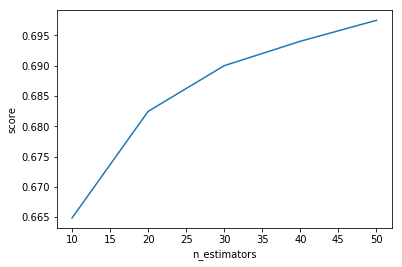

In [7]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

##### Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти выше по тексту. Какое качество при этом получилось?

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:16:15. Показатель метрики качества AUC-ROC в таком случае равен 0.69.

##### Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что можно сделать, чтобы ускорить его обучение при увеличении количества деревьев?

Дa, имеет смысл использовать более 30 деревьев. Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC. Он стремится к 0.7.  
Для ускорения обучения можно уменьшить глубину деревьев (max_depth) или можно использовать не всю выборку, а некоторое ее подмножество.

# Подход 2: логистическая регрессия

In [4]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
%matplotlib inline

In [6]:
def get_clean_data(cleaner_name='clean'):
    path = './clean/' + cleaner_name
    X_train = pandas.read_csv(path + '/X_train.csv', index_col='match_id')
    y_train = pandas.read_csv(path + '/y_train.csv', index_col='match_id')
    X_test = pandas.read_csv(path + '/X_test.csv', index_col='match_id')
    return X_train, y_train['radiant_win'], X_test

In [7]:
X, y, X_kaggle = get_clean_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print('C =', str(C))
    model = LogisticRegression(solver='lbfgs', C=C, random_state=42, n_jobs=None)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=None)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]

    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print(model_scores)
        print('Time elapsed:', datetime.datetime.now() - start_time)       
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    print("Max score:", C_range[max_score_index], max_score)
    
    min_score = min(scores)
    min_score_index = scores.index(min_score)
    print("Min score:", C_range[min_score_index], min_score)

C = 1e-05
[0.69715107 0.69880673 0.69951849 0.69930606 0.70107295]
Time elapsed: 0:00:30.635897
C = 0.0001
[0.72354915 0.72407156 0.72464733 0.72596995 0.72695107]
Time elapsed: 0:00:20.019749
C = 0.001
[0.74465064 0.74667682 0.74412646 0.74880412 0.74740582]
Time elapsed: 0:00:33.055583
C = 0.01
[0.7494746  0.75279048 0.74925052 0.75539226 0.75178552]
Time elapsed: 0:01:01.301232
C = 0.1


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74943853 0.75315358 0.74950305 0.75597807 0.75165638]
Time elapsed: 0:03:13.740210
C = 1.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74937371 0.75316413 0.74949465 0.75601666 0.75158665]
Time elapsed: 0:04:34.044443
C = 10.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936566 0.75316877 0.74949792 0.75601767 0.75157764]
Time elapsed: 0:06:33.421629
C = 100.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936181 0.7531664  0.74949675 0.75601692 0.75157372]
Time elapsed: 0:06:21.594860
C = 1000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935759 0.7531667  0.74949577 0.75601455 0.75157612]
Time elapsed: 0:06:32.237578
C = 10000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936141 0.75316726 0.74949736 0.75601695 0.75157275]
Time elapsed: 0:08:39.571047
C = 100000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935907 0.7531674  0.74949715 0.75601525 0.75157281]
Time elapsed: 0:05:38.027989


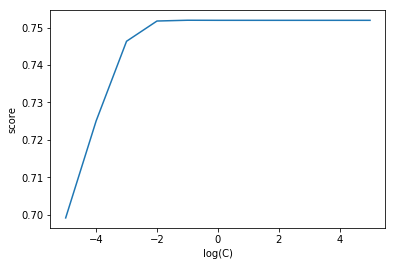

Max score: 0.1 0.751945922900405
Max score: 1e-05 0.699171062061466


In [37]:
test_model(X, y)

##### Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем можно объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. Это лучше градиентного бустинга по 50 деревьям. Логистическая регрессия работает быстрее по сравнению с градиентным бустингом.

# Удаление категориальных признаков

In [38]:
X, y, X_kaggle = get_clean_data('clean_category')
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C = 1e-05
[0.6929998  0.69476009 0.69560968 0.69507898 0.69701177]
Time elapsed: 0:00:34.686746
C = 0.0001
[0.70934892 0.71041905 0.71167711 0.71168669 0.71353197]
Time elapsed: 0:00:48.971890
C = 0.001
[0.71434549 0.71581481 0.71629762 0.71688793 0.7185335 ]
Time elapsed: 0:01:13.452466
C = 0.01
[0.7145036  0.71621974 0.71627984 0.71725108 0.71854174]
Time elapsed: 0:01:59.041820
C = 0.1
[0.71448111 0.71620877 0.71622672 0.71726946 0.71848302]
Time elapsed: 0:02:05.469039
C = 1.0
[0.71447746 0.71620674 0.71621937 0.71727383 0.71847432]
Time elapsed: 0:02:07.272870
C = 10.0
[0.71447697 0.71620771 0.71621935 0.71727417 0.71847447]
Time elapsed: 0:02:09.292381
C = 100.0
[0.71447697 0.71620728 0.71621932 0.71727431 0.71847421]
Time elapsed: 0:01:52.005824
C = 1000.0
[0.714477   0.71620729 0.71621932 0.7172743  0.7184742 ]
Time elapsed: 0:01:36.302923
C = 10000.0
[0.71447702 0.71620728 0.71621932 0.71727431 0.7184742 ]
Time elapsed: 0:01:35.576801
C = 100000.0
[0.71447702 0.71620728 0.7162

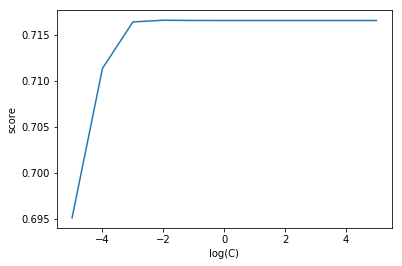

Max score: 0.01 0.7165592000076536
Max score: 1e-05 0.695092064575022


In [39]:
test_model(X, y)

##### Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?

Удаление категориальных признаков не повлияло на качество предсказания. Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

In [35]:
heroes = pandas.read_csv('./dictionaries/heroes.csv')
print('Героев в игре:', len(heroes))

Героев в игре: 112


##### Сколько различных идентификаторов героев существует в данной игре?

В данной игре существует 112 идентификаторов героев

# "Мешок слов" для кодирования информации о героях.

In [41]:
X, y, X_kaggle = get_clean_data('clean_category')
X_hero, _y, X_kaggle_hero = get_clean_data('hero_bag')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)
X_kaggle = pandas.DataFrame(scaler.transform(X_kaggle), index = X_kaggle.index)

X = pandas.concat([X, X_hero], axis=1)
X_kaggle = pandas.concat([X_kaggle, X_kaggle_hero], axis=1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
e:\python\introduction_to_ml\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


C = 1e-05
[0.69715107 0.69880673 0.69951849 0.69930606 0.70107295]
Time elapsed: 0:00:11.751175
C = 0.0001
[0.72354915 0.72407156 0.72464733 0.72596995 0.72695107]
Time elapsed: 0:00:12.752842
C = 0.001
[0.74465064 0.74667682 0.74412646 0.74880412 0.74740582]
Time elapsed: 0:00:31.594070
C = 0.01
[0.7494746  0.75279048 0.74925052 0.75539226 0.75178552]
Time elapsed: 0:01:14.569061
C = 0.1


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74943853 0.75315358 0.74950305 0.75597807 0.75165638]
Time elapsed: 0:01:31.808350
C = 1.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74937371 0.75316413 0.74949465 0.75601666 0.75158665]
Time elapsed: 0:01:49.439574
C = 10.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936566 0.75316877 0.74949792 0.75601767 0.75157764]
Time elapsed: 0:01:35.652719
C = 100.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936181 0.7531664  0.74949675 0.75601692 0.75157372]
Time elapsed: 0:01:38.264437
C = 1000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935759 0.7531667  0.74949577 0.75601455 0.75157612]
Time elapsed: 0:01:11.642618
C = 10000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936141 0.75316726 0.74949736 0.75601695 0.75157275]
Time elapsed: 0:01:35.222390
C = 100000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935907 0.7531674  0.74949715 0.75601525 0.75157281]
Time elapsed: 0:01:26.975435


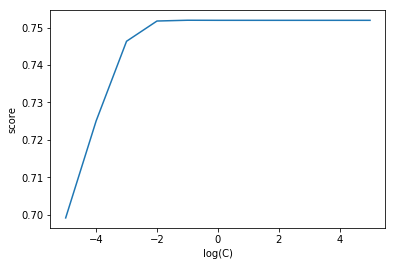

Max score: 0.1 0.751945922900405
Min score: 1e-05 0.699171062061466


In [42]:
test_model(X, y)

##### Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?

После добавления "мешка слов" по героям качество улучшилось - наилучшее значение показателя AUC-ROC при C = 0.1 равно 0.75. Это происходит потому что вместо случайного шума или отсутствия данных о героях для построения предсказания у нас есть осмысленная разреженная матрица.

##### Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

* Минимальное значение показателя AUC-ROC у лучшего алгоритма равно ~0.7 при C=0.00001
* Максимальное значение показателя AUC-ROC у лучшего алгоритма алгоритма равно ~0.75 при C=0.1